In [70]:
#! pip install ydata_profiling

In [71]:
!pip install hijri-converter

In [72]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
# from ydata_profiling import ProfileReport
# from pandas_profiling import ProfileReport
from google.colab import files
from hijri_converter import convert


## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [73]:
#Read in the csv file and convert to a Pandas dataframe
jadarat = pd.read_csv('Jadarat_data.csv')

In [74]:
# profile = ProfileReport(jadarat, explorative=True)  # Create profile report
# profile.to_file("report.html")  # Save as an interactive HTML file
# files.download("report.html") # Download the HTML report file  into local machine

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [75]:
# Display the first 3 rows
jadarat.head(3)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [76]:
#Display the first 3 rows
jadarat.head(3)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both


In [77]:
# Print the number of rows and columns in the dataset
print(f'This dataset has {jadarat.shape[0]} rwos and {jadarat.shape[1]} columns')

This dataset has 1470 rwos and 18 columns


In [78]:
# Print the label of the columns
jadarat.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

In [79]:
# Print the inforamtion about the data like missing values and data types
jadarat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


**Missing Values =	794**

The dataset has missing values in three columns:

- `comp_size` has 14 missing values.
- `eco_activity` has 90 missing values.
- `qualif` has 690 missing values.


**Data Types:**

All columns have the correct data type EXCEPT for `comp_no`, `positions` `exper` need to be intger. Also, for `job_date` should be converted to a datetime type.

**Note:** We prefer converting Hijri dates to Gregorian for the following reasons:

**1- Compatibility with Analytical Tools**

Most data analysis tools (such as pandas and matplotlib) rely on the Gregorian calendar when handling time series data.

**2- More Accurate Statistical Analyses**

Time Series Analysis can be performed without dealing with complex conversions, improving the accuracy and efficiency of the analysis.

In [80]:
# Generate descriptive statistics for categorical (object-type) columns in the 'jadarat' DataFrame.
# This will provide insights such as unique values, most frequent values (top), and their counts (freq).
jadarat.describe(include='object')

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
count,1470,1470,1470,1470,1470,1470,1470,1456,1380,780,1470,1470,1470,1470,1470,1470,1470
unique,324,92,438,444,886,894,2,7,361,615,14,114,393,2,25,6,3
top,بائع,09/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Language data', 'الانجليزية', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,both
freq,98,47,93,90,16,16,1465,635,65,28,622,523,449,1448,853,833,587


Some columns we do not need it for our analysis like `job_desc`, `job_tasks`, `comp_no`, `qualif`, `position` and `city`. So, we will drop them.

In [81]:
# Print count of hte unique values in categorical features
categorical_features = ['comp_type', 'comp_size', 'region', 'benefits', 'contract', 'exper', 'gender']

for i in categorical_features:
  print(jadarat[i].value_counts())
  print(8*'----')

comp_type
خاص           1465
شبه حكومية       5
Name: count, dtype: int64
--------------------------------
comp_size
صغيرة فئة ب     635
صغيرة فئة أ     325
متوسطة فئة أ    162
متوسطة فئة ب    134
كبيرة            78
متوسطة فئة ج     76
عملاقة           46
Name: count, dtype: int64
--------------------------------
region
الرياض             622
مكة المكرمة        369
المنطقة الشرقية    219
المدينة المنورة     86
الباحة              46
عسير                42
القصيم              32
حائل                18
تبوك                11
نجران                8
جازان                7
الجوف                5
الحدود الشمالية      4
اخرى                 1
Name: count, dtype: int64
--------------------------------
benefits
['Salary', '4000.0']                                                 449
['Salary', '5000.0']                                                 148
['Salary', '6000.0']                                                  86
['Salary', '4500.0']                                                

In [82]:
# Print the information about the region 'اخرى'
jadarat.loc[jadarat['region'] == 'اخرى'].values

array([['محاسب', '28/03/1444', "['محاسب عام']",
        "['يوقم بجميع مهام  الوظيفية بإستخدام برنامج حسابي خاص بالمؤسسة  وإدارة جميع المنظومات بالبرنامج المحاسبة']",
        'مؤسسة سلاسل بابل للمقاولات', '13-97350', 'خاص', 'صغيرة فئة ب',
        'ترميمات المباني السكنية والغير سكنية',
        "['Skill data', 'إجادة استخدام الحاسب', 'محترف', 'Language data', 'عربي انجليزي', 'متوسط', 'Professional certificate \\\\ License data', 'محاسب', 'ضروري']",
        'اخرى', 'ABU TARFA...', "['Salary', '4000.0']", 'دوام كامل',
        '0 / 3', 20202026208133, '0 Years', 'F']], dtype=object)

1- There is one company its region is 'اخرى' and its city has no meaning. So, we decided to search about the company and find its information to fill this row with correct and accurate value.

The company name is 'مؤسسة سلاسل بابل للمقاولات' and it is located in Makkah region.

2- Need to remove 'Years' from `exper` column to be intger data type.

3- The `gender` column need to be in Arabic also to be consistent with other columns.

Insights:
- The high demand for sales positions suggests that the retail sector is a significant employer in the job market.
- With 324 unique job roles, there is a diverse range of employment opportunities, indicating a dynamic job market.
- The dataset contains 886 unique company names out of 1470 total records, indicating that some companies have multiple job postings. This suggests that certain companies are more active in hiring than others. For example, "شركه العرض المتقن للخدمات التجارية شركة مساهمة سعودية مقفلة" has posted 16 job listings, making it one of the major employers in the job market within this dataset.
- In this dataset there are only two types of companies: private and semi-governmental.
-  The dataset indicates that an overwhelming majority of job postings (1465 out of 1470) come from private sector companies. This suggests that the private sector plays a crucial role in job creation and employment opportunities in the market.
- There are only 5 job postings from semi-governmental entities, highlighting a limited hiring presence from this sector. This could indicate fewer job openings in semi-governmental organizations or a preference for different recruitment channels.
- In this dataset, there are three main company sizes, each divided into different categories: small-sized companies (Includes Category A (صغيرة فئة أ) and Category B (صغيرة فئة ب)),
Medium-sized companies (Includes Category A (متوسطة فئة أ), Category B (متوسطة فئة ب), and Category C (متوسطة فئة ج)) and large companies (Includes "كبيرة" (Large) and "عملاقة" (Huge/Giant)).
- The majority of job postings come from small-sized companies, particularly those categorized as "صغيرة فئة ب" (635) and "صغيرة فئة أ" (325). This suggests that small businesses are significant contributors to job opportunities in the market.
- Companies classified as "متوسطة فئة أ" and "متوسطة فئة ب" have a noticeable presence, with 162 and 134 job postings, respectively. This indicates that mid-sized companies also play a substantial role in employment.
- Larger companies "كبيرة" (78) and giant companies "عملاقة" (46) have relatively fewer job postings. This could mean that they either have lower turnover rates, more stable workforces, or use alternative hiring methods.
- Job seekers might find more opportunities in small and medium-sized enterprises (SMEs) rather than in large corporations. Understanding this trend could help applicants tailor their job search strategies accordingly.
- The most frequent region appears to be الرياض (Riyadh), which suggests that Riyadh has the highest concentration of job postings. This aligns with Riyadh being the capital and a major business hub in Saudi Arabia.
- Some regions have far fewer job postings, indicating either lower economic activity, a smaller job market, or less data availability.
- The vast majority of job postings (1,448 out of 1,470) are for full-time positions. This suggests that employers in this dataset mainly offer stable, long-term employment rather than part-time or temporary roles.
- 833 job postings (out of 1,470) require 0 years of experience, meaning around 56.7% of job listings are open to fresh graduates.
- The remaining 637 job postings require experience (not explicitly stated but inferred from the total count). This indicates that while fresh graduates have good opportunities, experienced professionals are also sought after.
- 587 job postings (39.9%) specify "both" (meaning they are open to all genders). This indicates a fair degree of gender inclusivity in hiring.


In [83]:
# Generate descriptive statistics for all numeric columns in the 'jadarat' DataFrame.
# This includes count, mean, standard deviation, min, max, and quartiles.
jadarat.describe()

,job_post_id
count,1.470000e+03
mean,2.020203e+13
std,5.863941e+04
min,2.020203e+13
25%,2.020203e+13
50%,2.020203e+13
75%,2.020203e+13
max,2.020203e+13


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

The dataset is from (**Jadarat**) website and it is a unified national platform for employment in Saudi Arabia. The platform is supervised by the **Saudi Ministry of Human Resources and Social Development**, which enhances its reliability and validity.

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

The questions listed in the problem statement do not specify a particular period of time or whether they require data over multiple years. Therefore, the dataset should be the most recent one, and this dataset represents the most up-to-date data available.

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


The dataset is consistent because it is only one data source so the logical meaning it not will be change.

But, `gender` column need to be translated into Arabic to be consistent with other columns.

In [84]:
# go to clean it

#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [85]:
# Print the labels of the columns
jadarat.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

**1- Sample Appropriateness:**

This data aligns and suitable for our analysis objectives.

**2- Variable Selection:**

 All columns are important EXCEPT `'job_desc`, `job_tasks`, `comp_no`, `qualif`, `city`, and `positions`. So, we will drop them.

 Also, we need to extract the salaries from `benefits` column.

In [86]:
# go to drop unrelated columns and extract salaries from 'benefits' column.

#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


In [87]:
# Check for duplicates rows
jadarat.duplicated().sum()

1

In [88]:
# Print the duplicate row with the first occurrence row
jadarat[jadarat.duplicated(keep=False)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1469,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


In [89]:
# go to delete duplicates columns

#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [90]:
#Display number missing values per column
jadarat.isnull().sum()

,0
job_title,0
job_date,0
job_desc,0
job_tasks,0
comp_name,0
comp_no,0
comp_type,0
comp_size,14
eco_activity,90
qualif,690


In [91]:
# Check for null in comp_size column
jadarat[jadarat['comp_size'].isnull()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1296,مدير إداري,25/06/1444,['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...,[' المشاركة في تطوير الأهداف الرئيسية للشؤون...,مكتب تصميم المشاريع للاستشارات الهندسية,4-1990473,خاص,NaN,NaN,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '12400.0']",دوام كامل,0 / 1,20202026404052,7 Years,M
1393,موظف صندوق محاسبة,01/07/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مغاسل نسيم الفل للملابس,15-1963098,خاص,NaN,NaN,NaN,المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 3,20202026407308,0 Years,both
1399,موظف صندوق محاسبة,29/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مغاسل نسيم الفل للملابس,15-1963098,خاص,NaN,NaN,NaN,الرياض,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026407112,0 Years,both
1401,وسيط عقاري,29/06/1444,['مساعدة البائعين وتقديم اقتراحات بأفضل طريقة ...,[' تقييم رغبات العملاء والميزانيات المحددة و...,مؤسسة فانس العقارية,1-2268591,خاص,NaN,NaN,"['Skill data', 'عقاري', 'مبتدئ', 'Language dat...",الرياض,RUMAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026407053,0 Years,F
1409,محامي,29/06/1444,['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...,[' استقبال القضية وتحديد نوعها وتحليل عناصره...,شركة الخبراء المتحدون للمحاماة والاستشارات الق...,1-2334348,خاص,NaN,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026406912,2 Years,both
1411,أخصائي قانوني,29/06/1444,['مساعدة العملاء والمنشآت في مختلف المسائل الق...,[' تأهيل الطلبات وتقييم الخيارات القانونية، ...,شركة الخبراء المتحدون للمحاماة والاستشارات الق...,1-2334348,خاص,NaN,NaN,"['Skill data', 'إدارة وتنظيم المستندات والوثائ...",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406840,0 Years,both
1421,مدير مالي,29/06/1444,['المشاركة في تطوير الأهداف الرئيسية للإدارة ا...,[' المشاركة في تطوير الأهداف الرئيسية للإدار...,شركة إرفاء المحدودة (شركة شخص واحد),17-1989300,خاص,NaN,NaN,NaN,حائل,ABA AL HI...,"['Salary', '14000.0']",دوام كامل,0 / 1,20202026406695,7 Years,both
1426,مصفف شعر,29/06/1444,['تقديم المشورة للعميل وتسريح الشعر وتصفيفه وت...,[' استقبال العميل وإجلاسه على كرسي القص ووض...,صالون تشرين ثاني للتزيين النسائي,1-2593881,خاص,NaN,NaN,"['Skill data', 'صف الشعر', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406598,4 Years,F
1432,موظف صندوق محاسبة,27/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مؤسسة التذوق الحلو لتقديم الوجبات,1-2559144,خاص,NaN,NaN,NaN,الرياض,AL BIYAD...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406120,0 Years,M
1436,أخصائي علاج طبيعي,26/06/1444,['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...,[' دراسة وتحليل برنامج المعالجة الطبيعية الم...,مجمع ارجوان سامي بن نائف العتيبي الطبي,2-1949575,خاص,NaN,NaN,NaN,الرياض,AL KHARJ...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026405893,0 Years,F


Since it is only 14 out of 1470 rows, it will not effect if we dropped them.

In [92]:
# Check for null in eco_activity column
jadarat[jadarat['eco_activity'].isnull()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
25,مدير عام,26/05/1444,['المشاركة في وضع الأهداف العامة والسياسات وال...,[' المشاركة في وضع الأهداف والسياسات والمباد...,ورشة اضواء المشاعل للحدادة والالمنيوم,10-2010602,خاص,صغيرة فئة أ,NaN,"['Skill data', 'حداد', 'متوسط', 'Language data...",المدينة المنورة,AL MADINA...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026348601,0 Years,M
40,مدير فرع,25/05/1444,['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...,[' المشاركة في وضع وإعداد الخطط والأهداف الخ...,شركة الزي للتجارة,9-2079452,خاص,متوسطة فئة أ,NaN,"['Language data', 'العربية', 'محترف', 'الانجلي...",المنطقة الشرقية,DHAHRAN...,"['Salary', '4500.0', 'Benefits', 'حسب سنوات ال...",دوام كامل,0 / 1,20202026347650,2 Years,both
42,موظف استقبال فندق,25/05/1444,['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...,[' الحفاظ على قائمة الحجوزات، وتوفير السجلات...,فندق قصر الواحة الفندقية,1-2440535,خاص,صغيرة فئة ب,NaN,"['Skill data', 'الاستقبال الفندقي', 'محترف', '...",الرياض,AR RIYADH...,"['Salary', '4500.0', 'Benefits', 'تارقت شهري',...",دوام كامل,0 / 4,20202026347394,2 Years,both
47,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...",شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,NaN,"['Language data', 'العربية ', 'محترف']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 50,20202026346891,0 Years,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,مشرف مدخلي البيانات,26/06/1444,['الإشراف على مدخلي البيانات والتأكد من صحة ال...,[' تدقيق البيانات بعد إدخالها، والتأكد من صح...,خالد عوض الجوهي للمقاولات,1-2073853,خاص,NaN,NaN,"['Skill data', 'اتقان الحاسب ', 'متوسط', 'Lang...",الرياض,HAFIRAT N...,"['Salary', '4500.0']",دوام كامل,0 / 5,20202026405354,0 Years,both
1451,فني مختبر طبي,25/06/1444,['تفقد وتشغيل وخدمة معدات المختبر،أخذ عينات ال...,[' تفقد وتشغيل وخدمة معدات حفظ وفحص العينات ...,مجمع ابتسامة العائلة الطبي,1-2599562,خاص,NaN,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026404173,0 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M


Replace this null values with constant value (غير معروف).

In [93]:
# go to clean them

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [94]:
# check columns types
jadarat.dtypes

,0
job_title,object
job_date,object
job_desc,object
job_tasks,object
comp_name,object
comp_no,object
comp_type,object
comp_size,object
eco_activity,object
qualif,object


-  `job_date` should be converted to a datetime type.
- `exper` need to remove 'Years' to be intger data type.

In [95]:
# go to clean them

In [96]:
# check outliers

In [97]:
# Print the labels of the columns
jadarat.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

In [98]:
! pip install arabic-reshaper
! pip install python-bidi

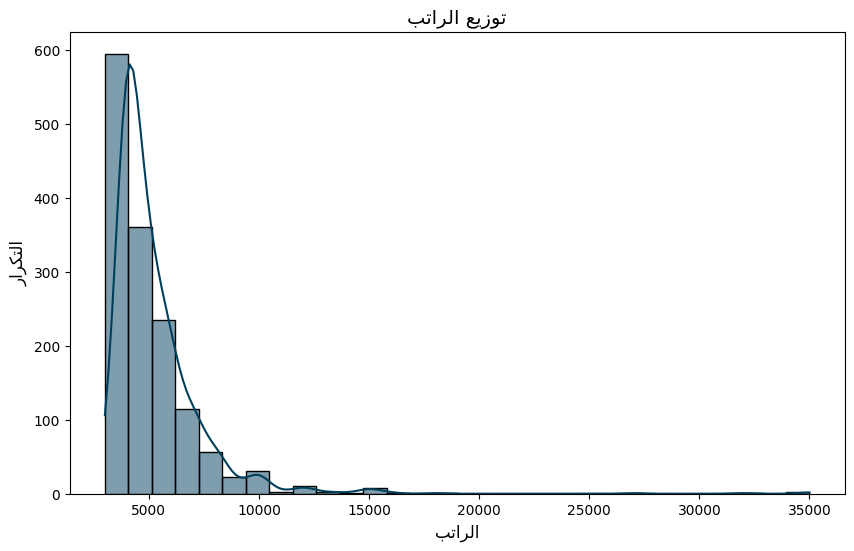

In [157]:
# Import required libraries
import arabic_reshaper
from bidi.algorithm import get_display

# Define a custom blue-green gradient palette
custom_palette = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087",
                  "#f95d6a", "#ff7c43", "#ffa600", "#28a745", "#17a2b8"]

# Set Seaborn default palette globally
sns.set_palette(custom_palette)

# Arabic text preparation
title = get_display(arabic_reshaper.reshape('توزيع الراتب'))
xlabel = get_display(arabic_reshaper.reshape('الراتب'))
ylabel = get_display(arabic_reshaper.reshape('التكرار'))

# Set plot size
plt.figure(figsize=(10, 6))

# Plot salary histogram using the custom palette
sns.histplot(jadarat['salary'], bins=30, kde=True, color=custom_palette[0])  # Dark blue from the palette

# Add title and labels with formatted Arabic text
plt.title(title, fontsize=14)
plt.xlabel(xlabel, fontsize=12)
plt.ylabel(ylabel, fontsize=12)

# Show the plot
plt.show()


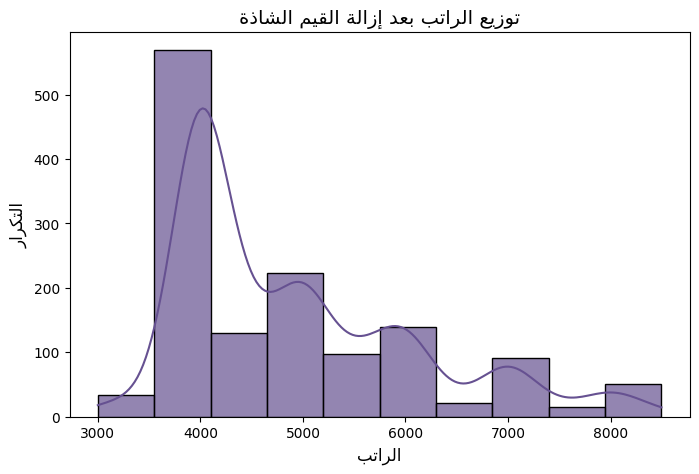

In [158]:
# Arabic text preparation
title = get_display(arabic_reshaper.reshape("توزيع الراتب بعد إزالة القيم الشاذة"))
xlabel = get_display(arabic_reshaper.reshape("الراتب"))
ylabel = get_display(arabic_reshaper.reshape("التكرار"))

# Remove outliers using 95% percentile (keep only first 95%)
filtered_salaries = jadarat[jadarat['salary'] < jadarat['salary'].quantile(0.95)]

# Set figure size
plt.figure(figsize=(8, 5))

# Plot histogram using Seaborn with color from the custom palette
sns.histplot(filtered_salaries['salary'], bins=10, kde=True, color=custom_palette[2], edgecolor='black', alpha=0.7)

# Add title and labels with formatted Arabic text
plt.title(title, fontsize=14)
plt.xlabel(xlabel, fontsize=12)
plt.ylabel(ylabel, fontsize=12)

# Show the plot
plt.show()


<ipython-input-159-b1704cb2ee84>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-159-b1704cb2ee84>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_arabic, rotation=45)


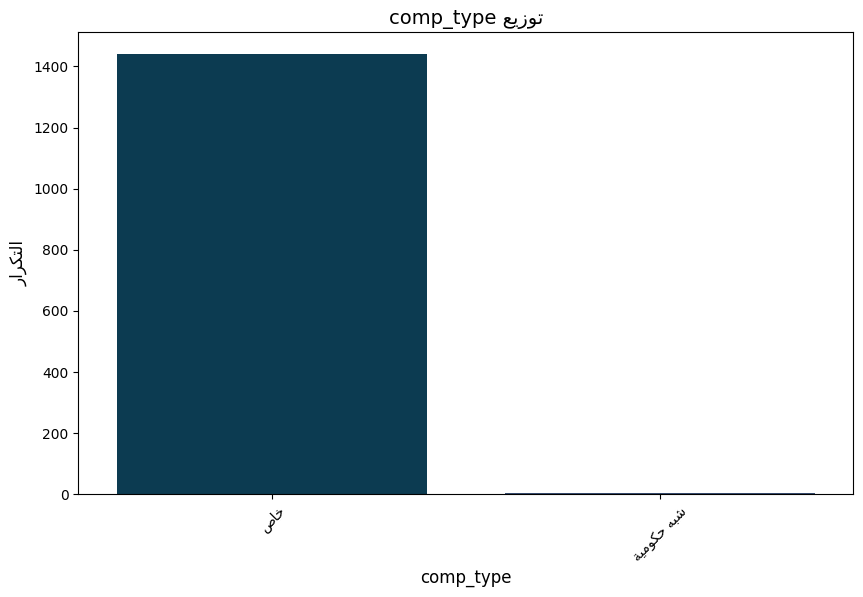

<ipython-input-159-b1704cb2ee84>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-159-b1704cb2ee84>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_arabic, rotation=45)


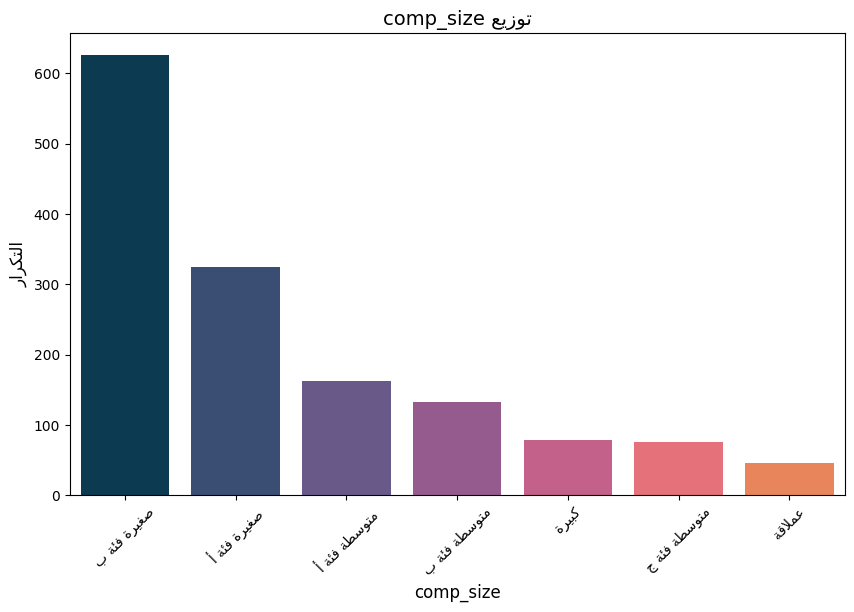

<ipython-input-159-b1704cb2ee84>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-159-b1704cb2ee84>:14: UserWarning: 
The palette list has fewer values (10) than needed (13) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(
<ipython-input-159-b1704cb2ee84>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_arabic, rotation=45)


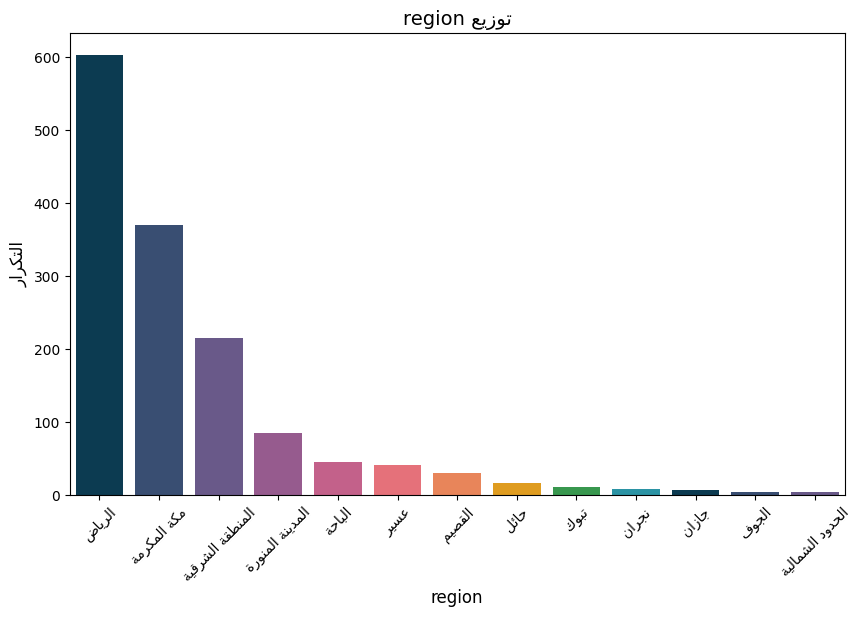

In [159]:
# Define the columns to be plotted.
columns_to_plot = ['comp_type', 'comp_size', 'region']

# Iterate over each column to create bar charts
for col in columns_to_plot:
    if col in jadarat.columns:  # Check if the column exists in the dataset
        plt.figure(figsize=(10, 6))

        # Arabic text formatting for categories
        labels = jadarat[col].value_counts().index.tolist()
        labels_arabic = [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

        # Plot a bar chart with custom palette colors
        ax = sns.barplot(
            x=jadarat[col].value_counts().index,
            y=jadarat[col].value_counts().values,
            palette=custom_palette[:len(labels)]  # Assign different colors for each category
        )

        # Replace x-axis labels with Arabic
        ax.set_xticklabels(labels_arabic, rotation=45)

        # Set titles in Arabic
        plt.title(get_display(arabic_reshaper.reshape(f'توزيع {col}')), fontsize=14)
        plt.xlabel(get_display(arabic_reshaper.reshape(col)), fontsize=12)
        plt.ylabel(get_display(arabic_reshaper.reshape('التكرار')), fontsize=12)

        # Show the plot
        plt.show()
    else:
        print(f"The column '{col}' is not in the dataset.")

**What is an Outlier?**
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR

![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics

In [ ]:
# go to delete ouliers

## 2. Data Cleaning:

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



**1- Handling missing values:**

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


**2- Correcting errors**

-------------------

**3- Dealing with outliers:**

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


#### 1- converting Hijri dates to Gregorian

In [100]:
from hijri_converter import convert

def hijri_to_gregorian(hijri_date):
    try:
        day, month, year = map(int, hijri_date.split('/'))

        if not (1 <= month <= 12 and 1300 <= year <= 1500):
            return None

        return convert.Hijri(year, month, day).to_gregorian()

    except Exception as e:
        return None

In [101]:
jadarat['job_date_gregorian'] = jadarat['job_date'].apply(hijri_to_gregorian)
jadarat[['job_date', 'job_date_gregorian']].head()

,job_date,job_date_gregorian
0,27/05/1444,2022-12-21
1,27/05/1444,2022-12-21
2,27/05/1444,2022-12-21
3,27/05/1444,2022-12-21
4,27/05/1444,2022-12-21


In [102]:
jadarat['job_date_gregorian'].isnull().sum()

47

Missing values in job_date_gregorian

In [103]:
jadarat.loc[:,'job_date_gregorian'] = pd.to_datetime(jadarat['job_date_gregorian'], errors='coerce')

print(jadarat['job_date_gregorian'].dtype)
print(jadarat['job_date_gregorian'].isnull().sum())


object
47


#### 2- Correct the `region` that has value 'اخرى' to 'مكة المكرمة'

In [104]:
jadarat['region'] = jadarat['region'].replace({'اخرى': 'مكة المكرمة'})
jadarat['region'].value_counts()

,count
region,
الرياض,622
مكة المكرمة,370
المنطقة الشرقية,219
المدينة المنورة,86
الباحة,46
عسير,42
القصيم,32
حائل,18
تبوك,11


#### 3- Change `gender` column values into Arabic

In [105]:
jadarat['gender'].unique()  # Check the unique values before changing

array(['both', 'M', 'F'], dtype=object)

In [106]:
gender_mapping = {'both': 'ذكور وإناث', 'M': 'ذكور', 'F': 'إناث'} # Map the original value to the new one
jadarat['gender'] = jadarat['gender'].map(gender_mapping)
jadarat['gender'].value_counts()

,count
gender,
ذكور وإناث,587
ذكور,480
إناث,403


In [107]:
# go back to 4th dimention --> Relevance

#### 4- Drop Unrelated columns and Extract Salaries from `benefits` column

In [108]:
jadarat.drop(columns=['job_desc', 'job_tasks', 'comp_no', 'qualif', 'city', 'positions'], inplace=True)
jadarat.columns

Index(['job_title', 'job_date', 'comp_name', 'comp_type', 'comp_size',
       'eco_activity', 'region', 'benefits', 'contract', 'job_post_id',
       'exper', 'gender', 'job_date_gregorian'],
      dtype='object')

In [109]:
import ast

jadarat['benefits'] = jadarat['benefits'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
jadarat['salary'] = jadarat['benefits'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)
jadarat['salary'] = pd.to_numeric(jadarat['salary'], errors='coerce')
jadarat[['benefits', 'salary']].head()


,benefits,salary
0,"[Salary, 5000.0]",5000.0
1,"[Salary, 5000.0]",5000.0
2,"[Salary, 4000.0]",4000.0
3,"[Salary, 5000.0]",5000.0
4,"[Salary, 5000.0]",5000.0


In [110]:
jadarat['salary'].isnull().sum()

0

In [111]:
jadarat['benefits_extracted'] = jadarat['benefits'].apply(lambda x: x[3] if isinstance(x, list) and len(x) > 3 else 'لا يوجد بدلات')
jadarat['benefits_extracted'] = jadarat['benefits_extracted'].apply(lambda x: 'يوجد بدلات' if x != 'لا يوجد بدلات' else x)
print(jadarat['benefits_extracted'].value_counts())


benefits_extracted
لا يوجد بدلات    1080
يوجد بدلات        390
Name: count, dtype: int64


In [112]:
jadarat['benefits_extracted'].isnull().sum()

0

In [113]:
jadarat.drop(columns=['benefits'], inplace=True)
jadarat.columns


Index(['job_title', 'job_date', 'comp_name', 'comp_type', 'comp_size',
       'eco_activity', 'region', 'contract', 'job_post_id', 'exper', 'gender',
       'job_date_gregorian', 'salary', 'benefits_extracted'],
      dtype='object')

In [114]:
# go back to 5th dimention --> Uniqueness

#### 5- Drop duplicate row

In [115]:
jadarat.drop_duplicates(inplace=True)

In [116]:
# go back to 6th dimention --> Completeness

#### 6- drop the 14 null values in `comp_size` and replace the null value in `eco_activity` with constant value (غير معروف).

In [117]:
jadarat = jadarat.dropna(subset=['comp_size'])

In [118]:
jadarat.loc[:, 'eco_activity'] = jadarat['eco_activity'].fillna('غير معروف')

In [119]:
# go back to 7th dimension Accuracy

#### 7- Change data type for `exper` column

In [120]:
# Extract numbers from 'exper' and convert them to numeric
jadarat.loc[:, 'exper'] = pd.to_numeric(
    jadarat['exper'].astype(str).str.extract('(\d+)')[0], errors='coerce'
)

## Analysis

### 3. Univariate Analysis:

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

#### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

##### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

##### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

#### 2. Univariate Non-Graphical analysis:

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

### 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart|


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

<ipython-input-131-bf56bd6ab395>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=[get_display(arabic_reshaper.reshape(job)) for job in top_jobs.index], palette="viridis")


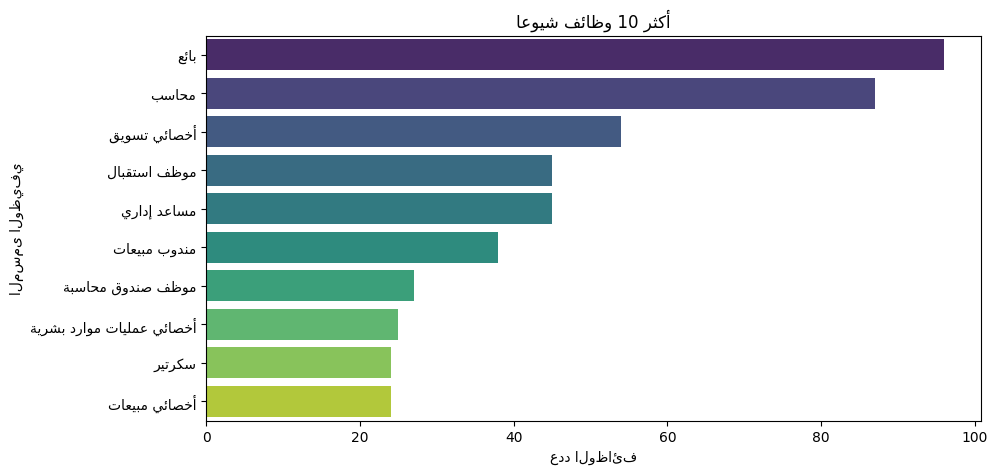

In [131]:
plt.figure(figsize=(10, 5))
top_jobs = jadarat['job_title'].value_counts().head(10)
sns.barplot(x=top_jobs.values, y=[get_display(arabic_reshaper.reshape(job)) for job in top_jobs.index], palette="viridis")
plt.xlabel("عدد الوظائف")
plt.ylabel("المسمى الوظيفي")
plt.title(get_display(arabic_reshaper.reshape("أكثر 10 وظائف شيوعًا")))
plt.show()

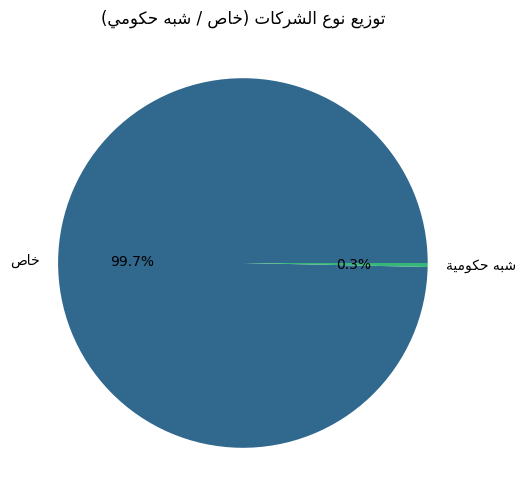

In [145]:
# Plot the company types distributions
plt.figure(figsize=(6, 6))
company_counts = jadarat['comp_type'].value_counts()
plt.pie(company_counts.values, labels=[get_display(arabic_reshaper.reshape(str(label))) for label in company_counts.index], autopct='%1.1f%%', colors=sns.color_palette("viridis", len(company_counts)))
plt.title(get_display(arabic_reshaper.reshape("توزيع نوع الشركات (خاص / شبه حكومي)")))
plt.show()

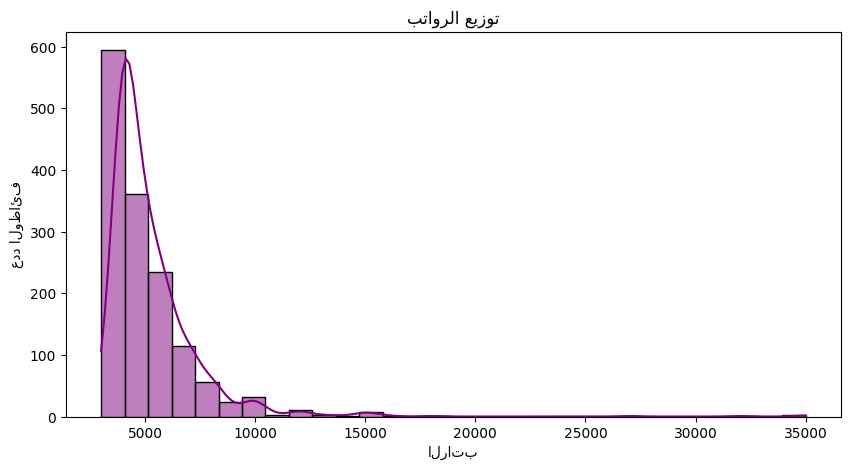

In [147]:
# Plot the salary distribution
plt.figure(figsize=(10, 5))
sns.histplot(jadarat['salary'], bins=30, kde=True, color='purple')
plt.xlabel("الراتب")
plt.ylabel("عدد الوظائف")
plt.title(get_display(arabic_reshaper.reshape("توزيع الرواتب")))
plt.show()

<ipython-input-148-11f7f9e7e2ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[get_display(arabic_reshaper.reshape(region)) for region in region_counts.index], y=region_counts.values, palette="viridis")


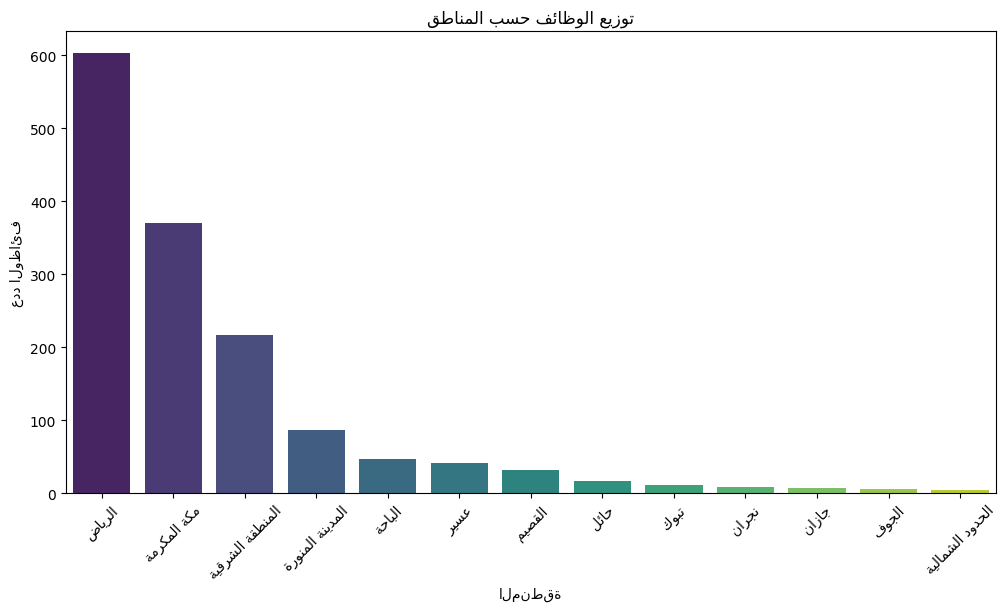

In [148]:
# 4. Plot jobs distribution by regions
plt.figure(figsize=(12, 6))
region_counts = jadarat['region'].value_counts()
sns.barplot(x=[get_display(arabic_reshaper.reshape(region)) for region in region_counts.index], y=region_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("المنطقة")
plt.ylabel("عدد الوظائف")
plt.title(get_display(arabic_reshaper.reshape("توزيع الوظائف حسب المناطق")))
plt.show()

<ipython-input-149-7715c9dac1e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=jadarat['comp_type'], y=jadarat['salary'], palette="viridis")


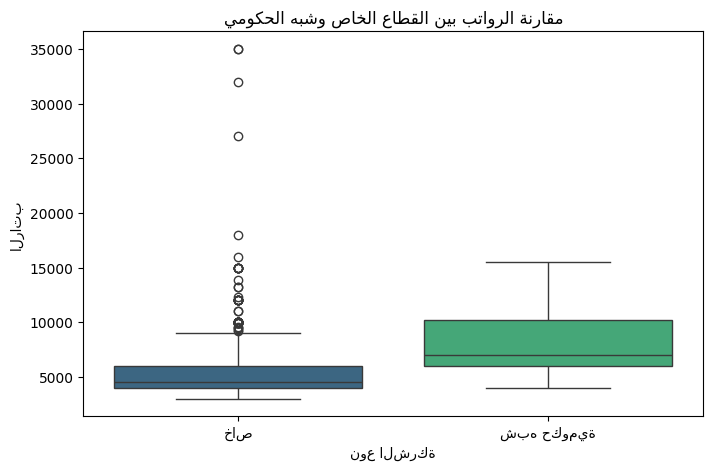

In [149]:
# Compare the salary between company types
plt.figure(figsize=(8, 5))
sns.boxplot(x=jadarat['comp_type'], y=jadarat['salary'], palette="viridis")
plt.xlabel("نوع الشركة")
plt.ylabel("الراتب")
plt.title(get_display(arabic_reshaper.reshape("مقارنة الرواتب بين القطاع الخاص وشبه الحكومي")))
plt.show()

<ipython-input-139-2cc322e26080>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[get_display(arabic_reshaper.reshape(exp)) for exp in exp_counts.index], y=exp_counts.values, palette="viridis")


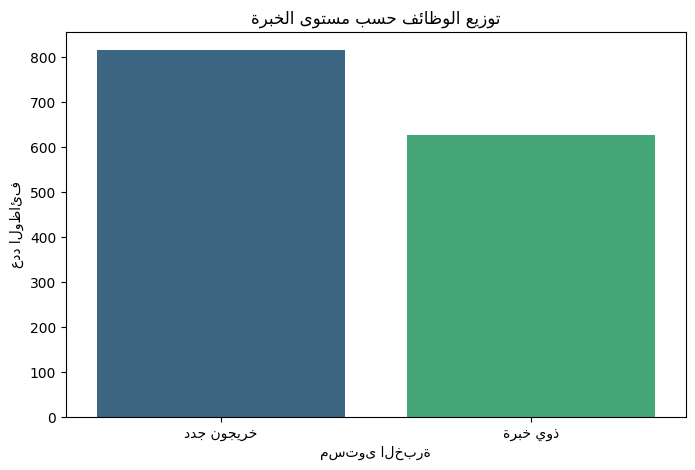

In [139]:
# Jpb distribution by experience level
plt.figure(figsize=(8, 5))
exp_counts = jadarat['experience_categories'].value_counts()
sns.barplot(x=[get_display(arabic_reshaper.reshape(exp)) for exp in exp_counts.index], y=exp_counts.values, palette="viridis")
plt.xlabel("مستوى الخبرة")
plt.ylabel("عدد الوظائف")
plt.title(get_display(arabic_reshaper.reshape("توزيع الوظائف حسب مستوى الخبرة")))
plt.show()

<ipython-input-150-22270d62984d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=jadarat['gender'], y=jadarat['salary'], palette="viridis")


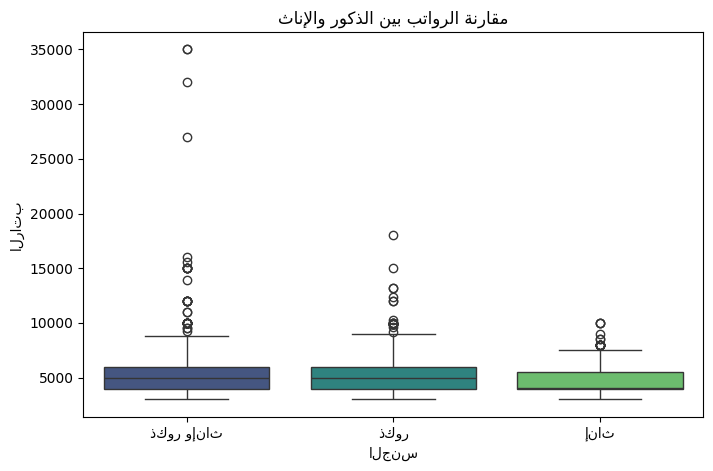

In [150]:
# Compare the salary between gender
plt.figure(figsize=(8, 5))
sns.boxplot(x=jadarat['gender'], y=jadarat['salary'], palette="viridis")
plt.xlabel("الجنس")
plt.ylabel("الراتب")
plt.title(get_display(arabic_reshaper.reshape("مقارنة الرواتب بين الذكور والإناث")))
plt.show()

<ipython-input-151-d0ac583f4fa7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[get_display(arabic_reshaper.reshape(contract)) for contract in contract_counts.index], y=contract_counts.values, palette="viridis")


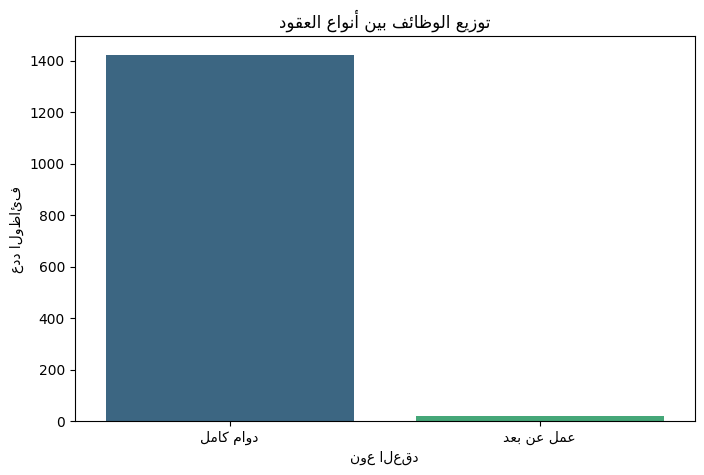

In [151]:
# Compare the jobs by contract types
plt.figure(figsize=(8, 5))
contract_counts = jadarat['contract'].value_counts()
sns.barplot(x=[get_display(arabic_reshaper.reshape(contract)) for contract in contract_counts.index], y=contract_counts.values, palette="viridis")
plt.xlabel("نوع العقد")
plt.ylabel("عدد الوظائف")
plt.title(get_display(arabic_reshaper.reshape("توزيع الوظائف بين أنواع العقود")))
plt.show()

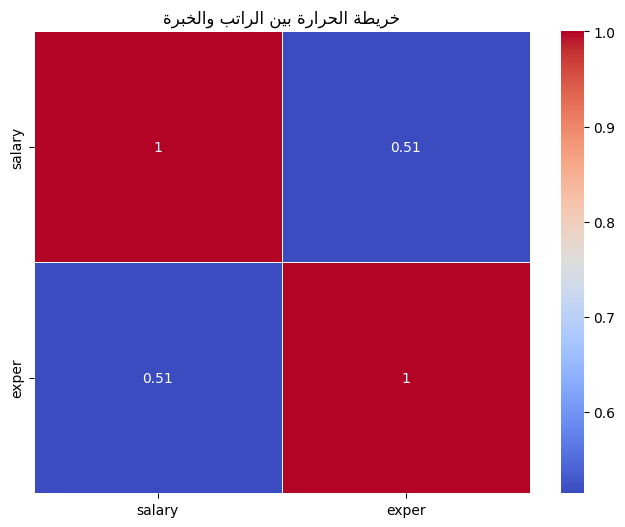

In [156]:
jadarat['exper'] = pd.to_numeric(jadarat['exper'], errors='coerce')

df_cleaned = jadarat[['salary', 'exper']].dropna()

# Plot heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title(get_display(arabic_reshaper.reshape("خريطة الحرارة بين الراتب والخبرة")))
plt.show()

## Questions:

### 1- What proportion of job postings is attributed to each region within the kingdom?

<ipython-input-121-77932ba04b32>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_labels, y=region_counts.values, palette=custom_palette[:len(region_labels)])
<ipython-input-121-77932ba04b32>:13: UserWarning: 
The palette list has fewer values (10) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=region_labels, y=region_counts.values, palette=custom_palette[:len(region_labels)])


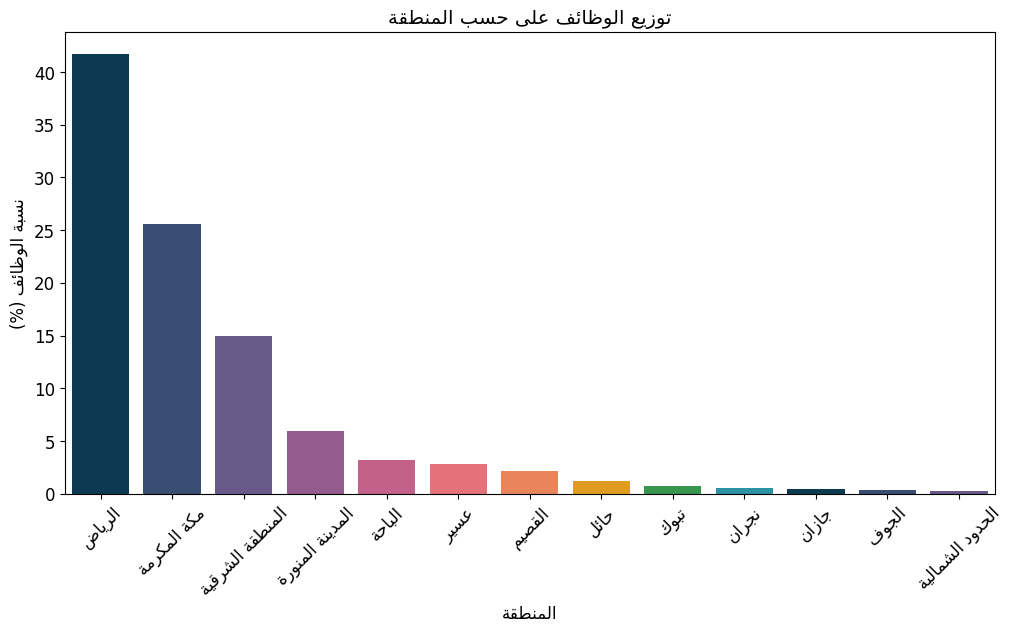

In [121]:
# Calculate the percentage distribution of job postings across different regions.
# 'value_counts(normalize=True)' returns the proportion of each unique region as a fraction.
# Multiplying by 100 converts these proportions into percentages.
region_counts = jadarat['region'].value_counts(normalize=True) * 100

# Reshape Arabic text for proper display
region_labels = [get_display(arabic_reshaper.reshape(str(label))) for label in region_counts.index]

# Set figure size before plotting to ensure correct layout
plt.figure(figsize=(12,6))

# Plot a bar chart for job distribution across regions using the custom palette
sns.barplot(x=region_labels, y=region_counts.values, palette=custom_palette[:len(region_labels)])

# Add titles and labels after plotting to ensure they are applied correctly
plt.title(get_display(arabic_reshaper.reshape("توزيع الوظائف على حسب المنطقة")), fontsize=14)
plt.xlabel(get_display(arabic_reshaper.reshape("المنطقة")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("نسبة الوظائف (%)")), fontsize=12)

# Adjust font and rotation to fix Arabic text misalignment
plt.xticks(rotation=45, fontsize=12, fontfamily="DejaVu Sans")  # Alternative fonts: "Tahoma" or "Simplified Arabic"
plt.yticks(fontsize=12)

# Show the final plot
plt.show()

###2- Is there a gender preference indicated in the job postings?

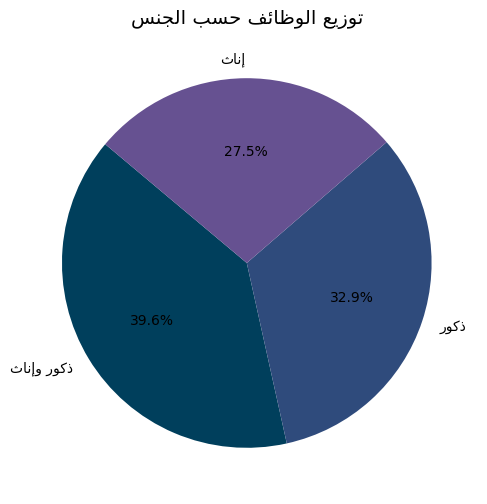

In [122]:
# Calculate the percentage distribution of job postings for each gender.
# 'value_counts(normalize=True)' returns the proportion of each unique gender as a fraction.
# Multiplying by 100 converts these proportions into percentages.
gender_counts = jadarat['gender'].value_counts(normalize=True) * 100

# Reshape and correct Arabic text for proper rendering
gender_labels = [get_display(arabic_reshaper.reshape(str(label))) for label in gender_counts.index]

# Set figure size for better visibility
plt.figure(figsize=(6,6))

# Plot the Pie Chart using the custom palette
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%',
        colors=custom_palette[:len(gender_counts)], startangle=140)

# Add the title (also reshaped)
plt.title(get_display(arabic_reshaper.reshape("توزيع الوظائف حسب الجنس")), fontsize=14)

# Show the plot
plt.show()


### 3- What is the expected salary range for fresh graduates?

In [123]:
# Filter jobs for new graduates
fresh_grads = jadarat[jadarat['exper'] == 0]['salary']

# Basic statistics calculation
salary_stats = fresh_grads.describe()

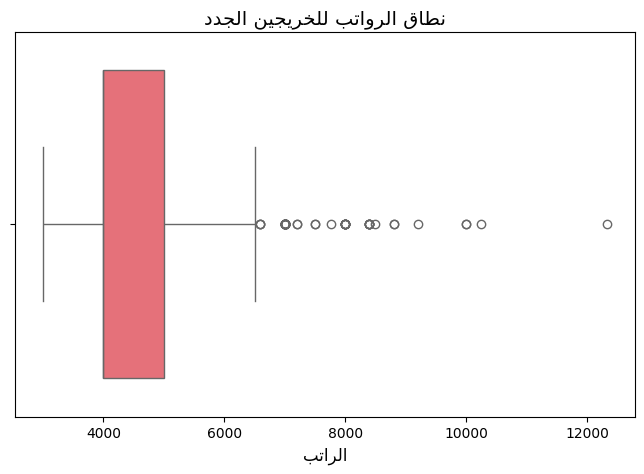

In [124]:
# Arabic text preparation for proper display
title = get_display(arabic_reshaper.reshape("نطاق الرواتب للخريجين الجدد"))
xlabel = get_display(arabic_reshaper.reshape("الراتب"))

# Set plot size
plt.figure(figsize=(8, 5))

# Box Plot of fresh graduates' salaries without outliers
sns.boxplot(x=fresh_grads, color=custom_palette[5])  # Use a selected color from the custom palette

# Add titles and labels with correct Arabic rendering
plt.title(title, fontsize=14)
plt.xlabel(xlabel, fontsize=12)

# Show the plot
plt.show()


### 4- Are job opportunities predominantly targeted at individuals with experience, or is there room for fresh graduates as well?

<ipython-input-125-6e3759e5ec9f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=experience_counts.index, y=experience_counts.values, palette=custom_palette[:len(experience_counts)])


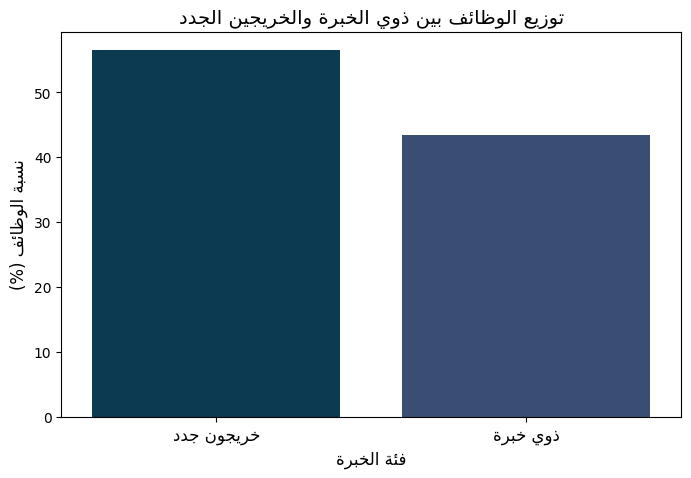

In [125]:
# Classify jobs into "experienced" and "fresh graduates"
experience_categories = jadarat['exper'].apply(lambda x: get_display(arabic_reshaper.reshape('خريجون جدد'))
                                               if x == 0 else get_display(arabic_reshaper.reshape('ذوي خبرة')))

# Calculate the percentage distribution
experience_counts = experience_categories.value_counts(normalize=True) * 100

# Arabic text preparation
title = get_display(arabic_reshaper.reshape("توزيع الوظائف بين ذوي الخبرة والخريجين الجدد"))
xlabel = get_display(arabic_reshaper.reshape("فئة الخبرة"))
ylabel = get_display(arabic_reshaper.reshape("نسبة الوظائف (%)"))

# Plot Bar Chart with custom colors
plt.figure(figsize=(8,5))
sns.barplot(x=experience_counts.index, y=experience_counts.values, palette=custom_palette[:len(experience_counts)])

# Add titles and labels
plt.title(title, fontsize=14)
plt.xlabel(xlabel, fontsize=12)
plt.ylabel(ylabel, fontsize=12)
plt.xticks(rotation=0, fontsize=12)

# Show the plot
plt.show()


### 5- Do fresh graduates receive benefits, or are benefits exclusive to experienced professionals?

<ipython-input-126-b341a3965c0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jadarat['experience_categories'] = jadarat['exper'].apply(lambda x: 'خريجون جدد' if x == 0 else 'ذوي خبرة')


<Figure size 800x500 with 0 Axes>

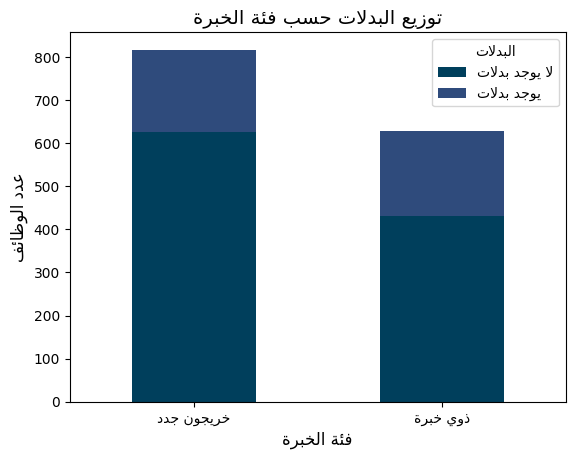

In [126]:
# Add the newly created experience classification as a column in the DataFrame
jadarat['experience_categories'] = jadarat['exper'].apply(lambda x: 'خريجون جدد' if x == 0 else 'ذوي خبرة')

# Create a Pivot Table to analyze the distribution of benefits across experience levels
benefits_by_experience = jadarat.groupby(['experience_categories', 'benefits_extracted']).size().unstack()

# Reshape Arabic text for proper display
title = get_display(arabic_reshaper.reshape("توزيع البدلات حسب فئة الخبرة"))
xlabel = get_display(arabic_reshaper.reshape("فئة الخبرة"))
ylabel = get_display(arabic_reshaper.reshape("عدد الوظائف"))

# Reshape legend labels
benefits_by_experience.index = [get_display(arabic_reshaper.reshape(label)) for label in benefits_by_experience.index]
benefits_by_experience.columns = [get_display(arabic_reshaper.reshape(col)) for col in benefits_by_experience.columns]

# Set figure size
plt.figure(figsize=(8,5))

# Plot the stacked bar chart with the custom palette
ax = benefits_by_experience.plot(kind='bar', stacked=True, color=custom_palette[:len(benefits_by_experience.columns)])

# Add titles and labels with reshaped Arabic text
plt.title(title, fontsize=14)
plt.xlabel(xlabel, fontsize=12)
plt.ylabel(ylabel, fontsize=12)
plt.xticks(rotation=0)  # Ensure labels are horizontal for better readability
plt.legend(title=get_display(arabic_reshaper.reshape("البدلات")))

# Show the plot
plt.show()


### 6- What are the top 10 most in-demand jobs in the market according to the analysis of Jadarat platform data?

<ipython-input-127-edc6654ceb0e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=[get_display(arabic_reshaper.reshape(job)) for job in top_jobs.index],


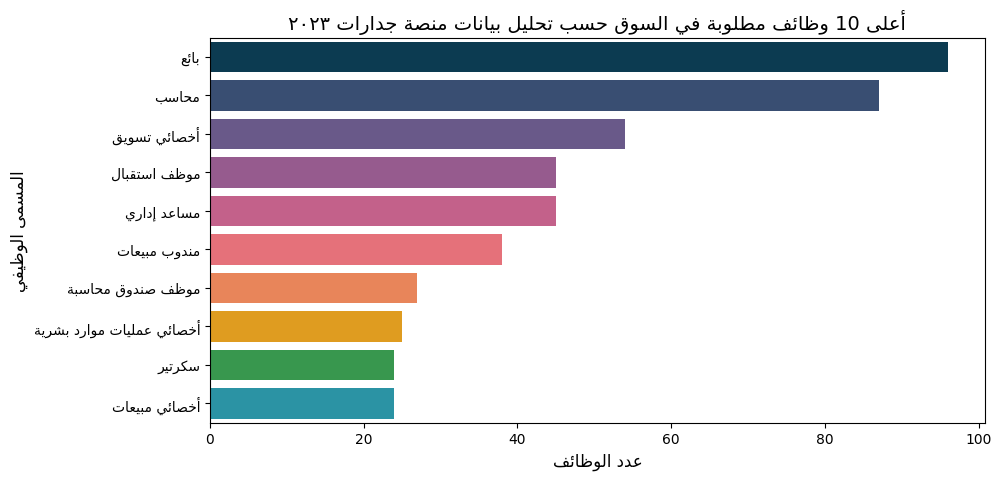

job_title
بائع                         96
محاسب                        87
أخصائي تسويق                 54
موظف استقبال                 45
مساعد إداري                  45
مندوب مبيعات                 38
موظف صندوق محاسبة            27
أخصائي عمليات موارد بشرية    25
سكرتير                       24
أخصائي مبيعات                24
Name: count, dtype: int64


In [127]:
# Calculate the most in-demand jobs by counting occurrences of each job title
top_jobs = jadarat['job_title'].value_counts().head(10)

# Reshape Arabic text for proper display
title = get_display(arabic_reshaper.reshape("أعلى 10 وظائف مطلوبة في السوق حسب تحليل بيانات منصة جدارات ٢٠٢٣"))
xlabel = get_display(arabic_reshaper.reshape("عدد الوظائف"))
ylabel = get_display(arabic_reshaper.reshape("المسمى الوظيفي"))

# Set up the figure size
plt.figure(figsize=(10,5))

# Plot the bar chart with horizontal bars and the custom palette
sns.barplot(x=top_jobs.values, y=[get_display(arabic_reshaper.reshape(job)) for job in top_jobs.index],
            palette=custom_palette[:len(top_jobs)])

# Add titles and labels
plt.title(title, fontsize=14)
plt.xlabel(xlabel, fontsize=12)
plt.ylabel(ylabel, fontsize=12)

# Show the plot
plt.show()

# Print the top 10 most in-demand jobs
print(top_jobs)


## conclusions


The findings from this dataset highlight a dynamic job market with considerable opportunities for fresh graduates, moderate gender inclusivity, and a concentration of employment in major economic regions. Understanding these trends can help job seekers tailor their job search strategies, while policymakers and businesses can use these insights to address gaps in employment distribution, gender inclusion, and benefit allocation.



In [160]:
jadarat.head(1)

,job_title,job_date,comp_name,comp_type,comp_size,eco_activity,region,contract,job_post_id,exper,gender,job_date_gregorian,salary,benefits_extracted,experience_categories
0,محاسب,27/05/1444,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,الرياض,دوام كامل,20202026350419,0,ذكور وإناث,2022-12-21 00:00:00,5000.0,لا يوجد بدلات,خريجون جدد


In [129]:
# Save the cleaned dataset as a CSV file
jadarat.to_csv('cleaned_jadarat.csv', index=False, encoding='utf-8-sig')

# Confirm the file is saved
print("Dataset saved successfully as 'cleaned_jadarat.csv'")

Dataset saved successfully as 'cleaned_jadarat.csv'
